# Final Exam 

This is a "take home" final exam. We have given you 36 hours to solve this exam. It covers the material taught in the Course # 5 on RSA, Quantum Algorithms and Advanced Data Structures.

The exam is open notes: you are welcome to look up notes and videos of materials from our Coursera webpage. However, you are forbidden from asking others for solutions: this includes other students, friends, or asking for solutions from people on the web. 

Manually graded problems do not have any points assigned to them. All points are obtained by writing code that passes test cases.

The notebook should finish running in 1.5 minutes (roughly) or you will not get a grade on the exam. This is important since you should be employing efficient solutions to problems. 

We have given you useful code from our notes so that you do not have to cut and paste them. You should run those cells before attempting to solve the problem or run test cases.

This exam may require you to create simple quantum algorithms and implement them in QISKIT so that we can autograde your work.  We have presented QISKIT in our notes and provided many examples of how to express quantum circuits in QISKIT.  You may find documentation of QISKIT from the IBM website: https://docs.quantum.ibm.com/

## Problem 1 (5 points)

Suppose we are given a fraction $\frac{a}{b}$, wherein $a, b > 0$, we can its floor $f = \lfloor \frac{a}{b} \rfloor$ is the smallest whole number less than $\frac{a}{b}$ and ceiling $c = \lceil \frac{a}{b} \rceil$ is the smallest whole number greater than it.

Example: $a = 15, b = 4$, then $f = \lfloor \frac{15}{4} \rfloor = 3$ and $c = \lfloor \frac{15}{4} \rfloor = 4$. 

Given $a, b$, write down a program that returns two integers $p, q$ such that $ a = p \times \lfloor \frac{a}{b} \rfloor + q \times \lceil \frac{a}{b} \rceil$.

As an example, for $a = 15, b= 4$, your code should return $p = 3, q = 0$ since $ 15 = 5 * 3 + 0 * 4$. However, these numbers are not unique: $p = -15, q = 15$ is a valid answer.

__Hint:__ This is meant to be a simple warm up problem involving numbers. Do not over-think it. You can solve it using Extended Euclid's algorithm but there is a much simpler solution by thinking about the two cases separately: (case-1) when b divides a or (case-2) b does not divide a.

In [1]:
def find_pq(a, b):
    assert a >= 1
    assert b >= 1
    
    # your code here
#     raise NotImplementedError

    f = a // b
    if a % b == 0:
        return b, 0
    else:
        r = a - f * b
        p = b - r
        q = r
        return p, q

In [2]:
def test_solution(a, b, p, q):
    f = a//b
    if a % b == 0:
        c = f
    else:
        c = f + 1
    assert p * f + q * c == a, f'Test failed: {p}*{f} + {q} * {c} != {a}'

a = 15
b = 4
(p, q) = find_pq(a,b)
print(f'a={a}, b={b}. Your code returned p = {p}, q = {q}. ')
test_solution(a, b, p, q)
print('\t passed!')

a = 18
b = 6
(p, q) = find_pq(a,b)
print(f'a={a}, b={b}. Your code returned p = {p}, q = {q}. ')
test_solution(a, b, p, q)
print('\t passed!')

a = 5
b = 5
(p, q) = find_pq(a,b)
print(f'a={a}, b={b}. Your code returned p = {p}, q = {q}. ')
test_solution(a, b, p, q)
print('\t passed!')

a = 199
b = 45
(p, q) = find_pq(a,b)
print(f'a={a}, b={b}. Your code returned p = {p}, q = {q}. ')
test_solution(a, b, p, q)
print('\t passed!')
print('Passed: 5 points')

a=15, b=4. Your code returned p = 1, q = 3. 
	 passed!
a=18, b=6. Your code returned p = 6, q = 0. 
	 passed!
a=5, b=5. Your code returned p = 5, q = 0. 
	 passed!
a=199, b=45. Your code returned p = 26, q = 19. 
	 passed!
Passed: 5 points


## Problem 2 (15 points, Reciprocal of a Numer)

Let $a$ be a natural number and $n$ be a number relatively prime to $a$.

We say that $b$ is the reciprocal of $a$  modulo $n$ iff  $ (a \times b) \bmod n = 1 $. Note that $0 \leq b < n$.

__Part A (5 points)__ 

Write a function: `find_reciprocal_modulo` that given $a, n$ finds $b$. 

**Hint** First note that $a$ is relatively prime to $n$. What can you say about $GCD(a, n)$. 
Apply extended Euclid's algorithm to find the reciprocal.


In [3]:
# your code here
# raise NotImplementedError

def find_reciprocal_modulo(a, n):
    def egcd(x, y):
        if y == 0:
            return (x, 1, 0)
        g, s1, t1 = egcd(y, x % y)
        return (g, t1, s1 - (x // y) * t1)
    a = a % n
    g, x, _ = egcd(a, n)
    if g != 1:
        raise ValueError("a and n are not coprime; reciprocal does not exist")
    return x % n

In [4]:
def test_inverse(a, n):
    b = find_reciprocal_modulo(a, n)
    print(f'Your code says reciprocal of {a} mod {n} = {b}')
    assert 0 <= b < n-1, f'Failed: Modular reciprocal must be between 0 and {n-1}'
    assert a * b % n == 1, f'Failed: {a}*{b} % {n} == {(a*b)%n} != 1'
    print('Check')
    
test_inverse(5, 91)
test_inverse(4, 17)
test_inverse(19, 5441)
test_inverse(12091105091, 12982090109011)
test_inverse(120198192810201991105091, 129820912981982109990901093091320109011)
test_inverse(1209111298918919938189805091, 78901092016012610901295109120190121298122090109011)
print('Passed: 5 points')

Your code says reciprocal of 5 mod 91 = 73
Check
Your code says reciprocal of 4 mod 17 = 13
Check
Your code says reciprocal of 19 mod 5441 = 2291
Check
Your code says reciprocal of 12091105091 mod 12982090109011 = 4549214005228
Check
Your code says reciprocal of 120198192810201991105091 mod 129820912981982109990901093091320109011 = 102815846141060919611767863095156605517
Check
Your code says reciprocal of 1209111298918919938189805091 mod 78901092016012610901295109120190121298122090109011 = 1570698048998130171113885169085419228582161169452
Check
Passed: 5 points


__Part B__ 

Note that given $n, a$ relatively prime to each other, we can write 
$$ n = \lfloor \frac{n}{a} \rfloor \times a + r $$ 
wherein $\lfloor \frac{n}{a} \rfloor $ is the quotient when $n$ is divided by $a$ and $r$ is the reminder. 

Suppose $r^{-1}$ is the modular reciprocal of $r$ modulo $n$ and $a^{-1}$ is the reciprocal of $a$ modulo $n$.

Prove that 
$$ a^{-1} = \left( - \lfloor \frac{n}{a} \rfloor \times r^{-1} \right) \mod n $$

Note that for a number $k > 0$, $(-k \bmod n) = n - (k \bmod n)$.

YOUR ANSWER HERE

__Part C (10 points)__ 

Implement function `find_all_modular_reciprocals(n)`  that given a prime number $n \geq 2$, returns an array of modular inverses $I[1], \ldots, I[n-1]$ wherein $I[j]$ denotes the number $j^{-1} \bmod n$. $0$ does not have a modular inverse and therefore, $I[0]$ can be ignored. Also note that $I[1] = 1$.

Use the relation above that 

$$I[j] = n - (\lfloor n/j \rfloor * I[n \bmod j]) \bmod n$$

to fill out the array $I$ in $O(n)$ time.

Warning: calling the code from previous problem risks making your solution too slow and receiving no grade on the final. The linear time solution will pass all tests within 10 seconds.

In [5]:
def find_all_modular_reciprocals(n):
    I = [1]*n # initialize an array of size n with all 1s
    
    # your code here
#     raise NotImplementedError
    if n < 2:
        return I
    I[0] = 0
    I[1] = 1
    for j in range(2, n):
        I[j] = (n - ((n // j) * I[n % j]) % n) % n
    return I

In [6]:
def test_modular_reciprocals(p):
    print(f'Testing for n = {p}')
    I = find_all_modular_reciprocals(p)
    for j in range(1, p):
        assert (I[j] * j)%p == 1, f'Failed: p = {p}, j = {j}, I[j] = {I[j]}, (j*I[j])%p = {(j*I[j])%p} '
    print('\t passed')

test_modular_reciprocals(5)
test_modular_reciprocals(11)
test_modular_reciprocals(19)
test_modular_reciprocals(113)
test_modular_reciprocals(1009)
test_modular_reciprocals(1013)
test_modular_reciprocals(7753)
test_modular_reciprocals(971767)
test_modular_reciprocals(999983)
test_modular_reciprocals(7304107)
test_modular_reciprocals(9999991)
print('Passed: 10 points')

Testing for n = 5
	 passed
Testing for n = 11
	 passed
Testing for n = 19
	 passed
Testing for n = 113
	 passed
Testing for n = 1009
	 passed
Testing for n = 1013
	 passed
Testing for n = 7753
	 passed
Testing for n = 971767
	 passed
Testing for n = 999983
	 passed
Testing for n = 7304107
	 passed
Testing for n = 9999991
	 passed
Passed: 10 points


## Problem 3 (20 points)

In this problem, we would like you to convert the computation of multi-control quantum gates into a series of applications of controlled quantum gates involving no more than two control qubits at a time.

$$\newcommand\ket[1]{\left| #1 \right\rangle}$$
Suppose we have $n$ control qubits $b_1, \ldots, b_n$ and a target qubit $r$, let $U$ be a single qubit unitary operation. Recall that the multi-controlled $U$ operation with control qubits $b_1, \ldots, b_n$ and target qubit $r$ is defined as follows:

if $\ket{b_1, \ldots, b_n} = \ket{1\ldots 1}$ then transform $\ket{r'} = U \ket{r}$. Otherwise, if $\ket{b_1, \ldots, b_n} \not= \ket{1\ldots 1}$ then leave $\ket{r}$ unchanged: $\ket{r'} = \ket{r}$.

### Example

Suppose $U$ is a rotation with $\theta = \frac{\pi}{8}$: 
$$U = \left[ \begin{matrix} \cos(\pi/8) & \sin(\pi/8) \\ -\sin(\pi/8) & \cos(\pi/8) \\ \end{matrix}\right]$$

Suppose we have control qubits $b_1, b_2, b_3$ then the multi-controlled rotation ($MCR_{\pi/8}$) with control qubits $b_1, b_2, b_3$ and target qubit $r$ acts as follows: 

$$\begin{array}{rl}
\ket{b_1b_2b_3} & \text{operation on target qubit} \\ 
\hline
\ket{000} & \ket{r'} = \ket{r} \\ 
\ket{001} & \ket{r'} = \ket{r} \\ 
\vdots & \\ 
\ket{110} &  \ket{r'} = \ket{r} \\ 
\ket{111} & \ket{r'} = U \ket{r} \\ 
\hline
\end{array}$$

Note, however that actual quantum systems cannot implement such general multi control gates due to constraints placed by their physical operation. 


Given a unitary operation $U$, a quantum register `b` specifying control qubits `b[0], ... b[n-1]`, a target qubit `r`, we would like you to design a quantum circuit that implements the multi-control $U$ operation with the register `b` as the control qubits, operating on `r` such that 
  - Your circuit can only use the following gates: 
    - Toffoli gate or control-control-X gate with two control qubits and a target qubit, that applies the quantum not operation to the target qubit only if both control qubits are $\ket{1}$ (see <a href="https://en.wikipedia.org/wiki/Toffoli_gate"> description of Toffoli gate</a>
    - The controlled-X gate.
    - The controlled-U gate with a single control qubit that applies $U$ to the target qubit.
  - Your circuit may also use at most $n-1$ ancillary qubits that are all initialized to $\ket{0}$.
  - After your circuit has finished executing, the ancillary qubits must all be set back to $\ket{0}$.

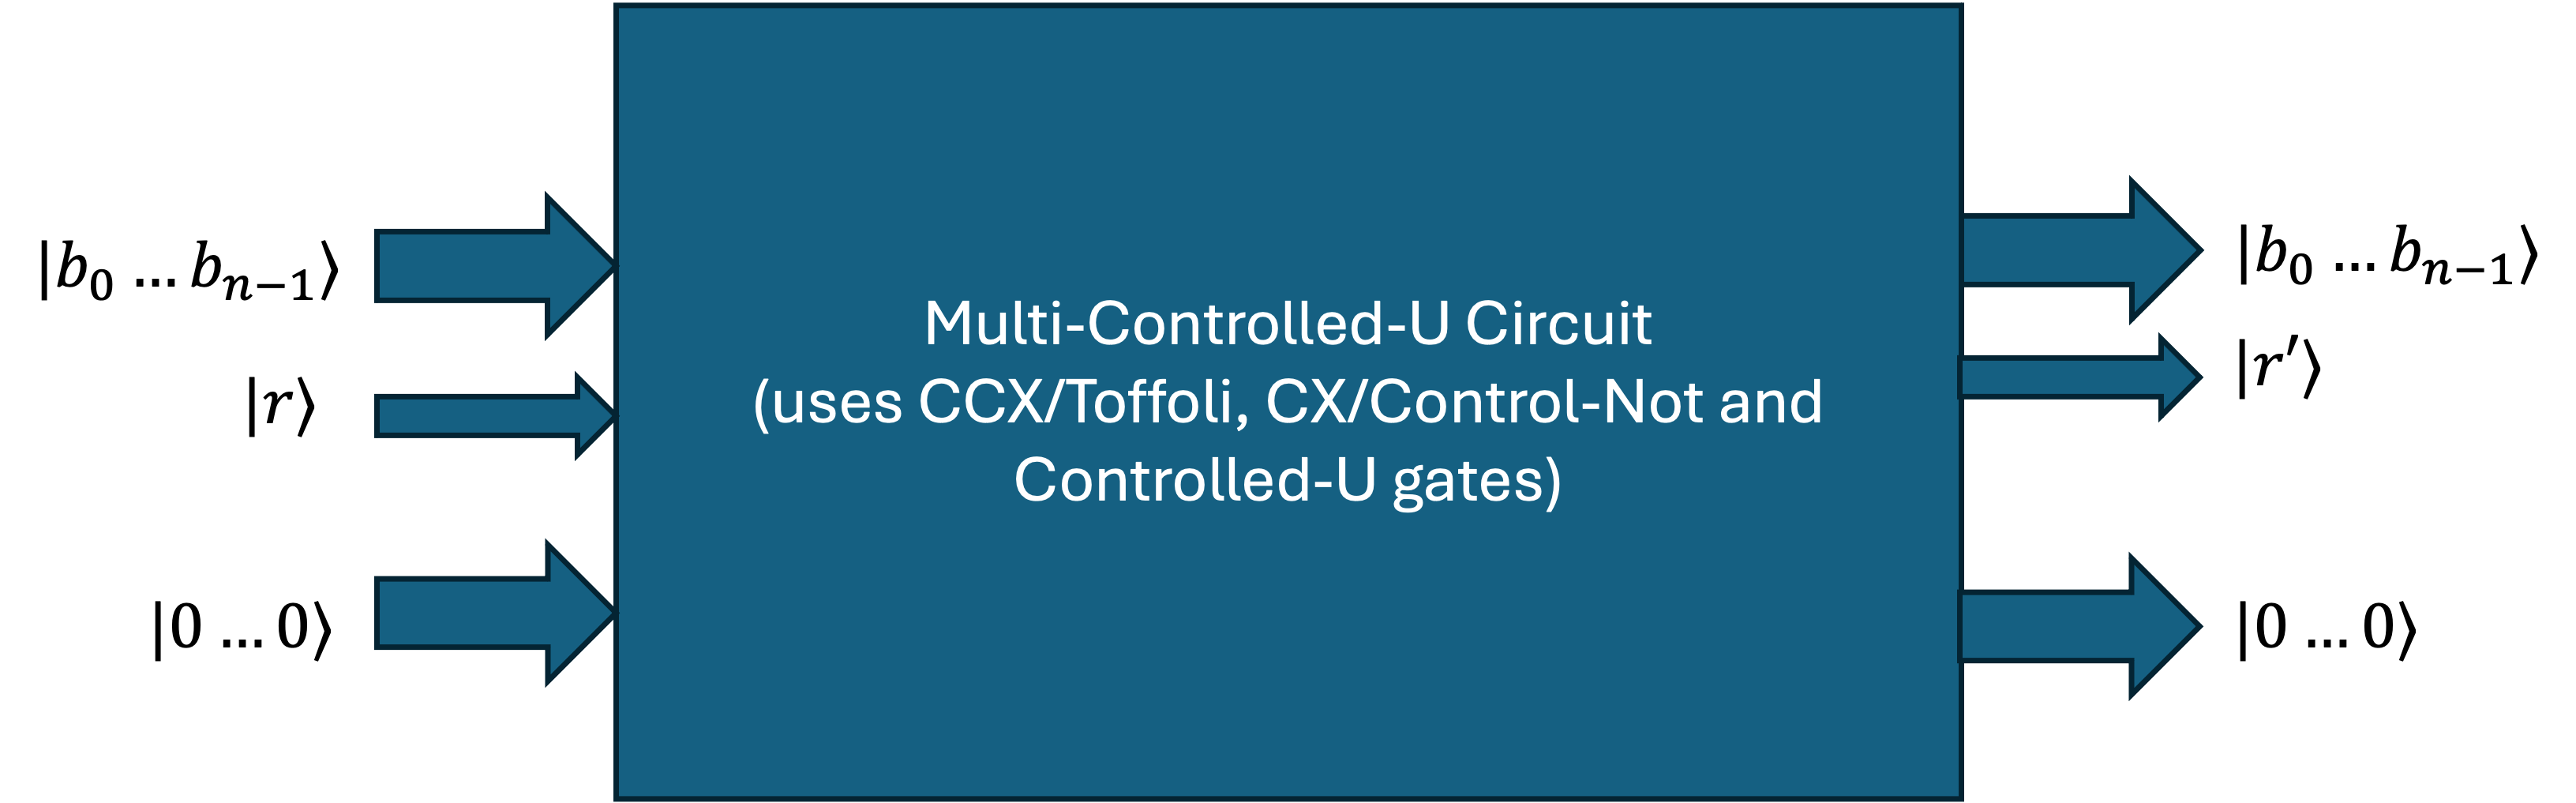</img>

Implement the function `create_multi_control_U(qc, b, r, ancilla, control_u_gate)` with inputs:
  - `qc`: a handle to a `QuantumCircuit`
  - `b`: a quantum register with `n = len(b)` control qubits
  - `r`: a single result qubit
  - `ancilla`: a quantum register with `n-1` ancillary qubits
  - `control_u_gate`: a reference to a function that when called as `control_u_gate(qc, ctrl_qubit, res_qubit)` will implement the controlled-U gate with the specified control qubit operating on the result qubit.
  
Your circuit can use only the specified gates and must ensure that the ancillary qubits are all transformed back to $\ket{0}$.


In [7]:
# your code here
# raise NotImplementedError

def create_multi_control_U(qc, b, r, ancilla, control_u_gate):
    n = len(b)
    if n == 1:
        control_u_gate(qc, b[0], r)
        return
        
    qc.ccx(b[0], b[1], ancilla[0])
    for i in range(2, n):
        qc.ccx(b[i], ancilla[i - 2], ancilla[i - 1])
        
    control_u_gate(qc, ancilla[n - 2], r)
    
    for i in range(n - 1, 1, -1):
        qc.ccx(b[i], ancilla[i - 2], ancilla[i - 1])
    qc.ccx(b[0], b[1], ancilla[0])
    
    

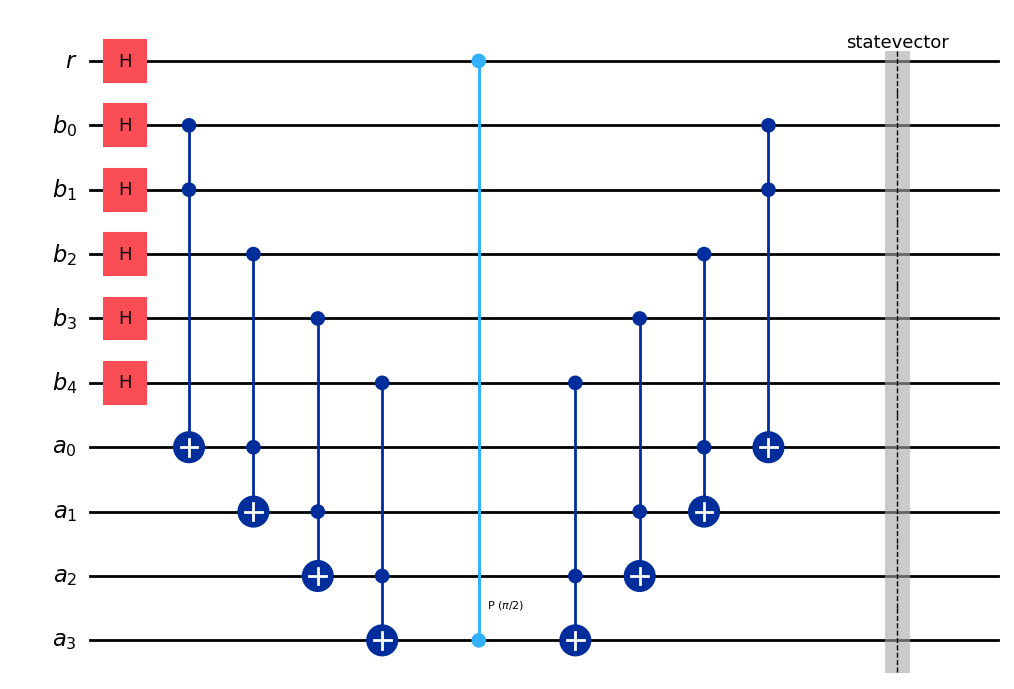

0 (0.1249999850988388+0j)
1 (0.1249999850988388+0j)
2 (0.1249999850988388+0j)
3 (0.1249999850988388+0j)
4 (0.1249999850988388+0j)
5 (0.1249999850988388+0j)
6 (0.1249999850988388+0j)
7 (0.1249999850988388+0j)
8 (0.1249999850988388+0j)
9 (0.1249999850988388+0j)
10 (0.1249999850988388+0j)
11 (0.1249999850988388+0j)
12 (0.1249999850988388+0j)
13 (0.1249999850988388+0j)
14 (0.1249999850988388+0j)
15 (0.1249999850988388+0j)
16 (0.1249999850988388+0j)
17 (0.1249999850988388+0j)
18 (0.1249999850988388+0j)
19 (0.1249999850988388+0j)
20 (0.1249999850988388+0j)
21 (0.1249999850988388+0j)
22 (0.1249999850988388+0j)
23 (0.1249999850988388+0j)
24 (0.1249999850988388+0j)
25 (0.1249999850988388+0j)
26 (0.1249999850988388+0j)
27 (0.1249999850988388+0j)
28 (0.1249999850988388+0j)
29 (0.1249999850988388+0j)
30 (0.1249999850988388+0j)
31 (0.1249999850988388+0j)
32 (0.1249999850988388+0j)
33 (0.1249999850988388+0j)
34 (0.1249999850988388+0j)
35 (0.1249999850988388+0j)
36 (0.1249999850988388+0j)
37 (0.12499

In [8]:
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, execute
from qiskit.providers.aer import Aer

def control_phase_gate(qc, ctrl, res):
    qc.cp(pi/2, ctrl, res)

b = QuantumRegister(5,'b')
r = QuantumRegister(1,'r')
a = QuantumRegister(4, 'a')
qc = QuantumCircuit(r, b,  a)
qc.h(b)
qc.h(r)
create_multi_control_U(qc, b,r[0], a, control_phase_gate )

## Examine the circuit to check that it only has the allowed gates
for gate in qc.data:
    assert gate[0].name in ['ccx', 'cp', 'h', 'cx', 'x'], f'Failed: your circuit is using a forbidden gate: {gate[0].name}'
# use a state vector simulator to obain the marked states
qc.save_statevector()
display(qc.draw('mpl', style='iqp'))

simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(qc).result()
statevector = result.get_statevector()

for j in range(63):
    print(j, statevector[j])
    assert abs(statevector[j].real -0.125)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude ~ 0.125 for state corr. to |{j}>. This can happen if you did not ensure that the ancillary qubits are all set back to 0"

print('63', statevector[63])
assert abs(statevector[63].real)<= 1E-03 and abs(statevector[63].imag -0.125)<= 1E-03, f"circuit must have amplitude 0.125j corr. to state |63>. This can happen if you did not implement the control phase operation correctly"


for j in range(64, 1024):
    print(j, statevector[j])
    assert abs(statevector[j].real)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude 0 for state corr. to |{j}>"

print('Passed: 10 points')

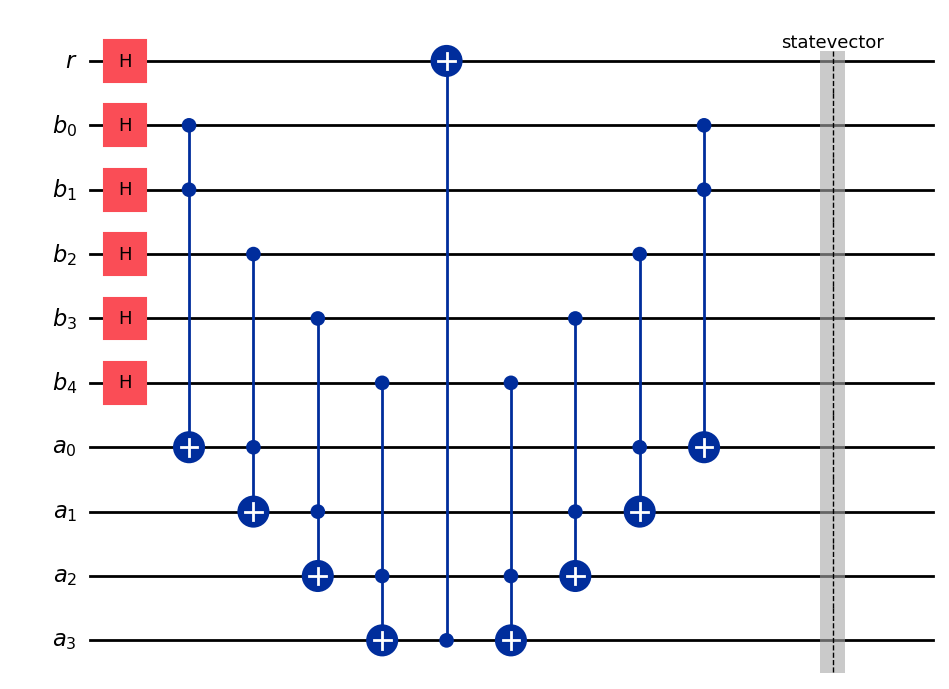

0 (0.1249999850988388+0j)
1 (0.1249999850988388+0j)
2 (0.1249999850988388+0j)
3 (0.1249999850988388+0j)
4 (0.1249999850988388+0j)
5 (0.1249999850988388+0j)
6 (0.1249999850988388+0j)
7 (0.1249999850988388+0j)
8 (0.1249999850988388+0j)
9 (0.1249999850988388+0j)
10 (0.1249999850988388+0j)
11 (0.1249999850988388+0j)
12 (0.1249999850988388+0j)
13 (0.1249999850988388+0j)
14 (0.1249999850988388+0j)
15 (0.1249999850988388+0j)
16 (0.1249999850988388+0j)
17 (0.1249999850988388+0j)
18 (0.1249999850988388+0j)
19 (0.1249999850988388+0j)
20 (0.1249999850988388+0j)
21 (0.1249999850988388+0j)
22 (0.1249999850988388+0j)
23 (0.1249999850988388+0j)
24 (0.1249999850988388+0j)
25 (0.1249999850988388+0j)
26 (0.1249999850988388+0j)
27 (0.1249999850988388+0j)
28 (0.1249999850988388+0j)
29 (0.1249999850988388+0j)
30 (0.1249999850988388+0j)
31 (0.1249999850988388+0j)
32 (0.1249999850988388+0j)
33 (0.1249999850988388+0j)
34 (0.1249999850988388+0j)
35 (0.1249999850988388+0j)
36 (0.1249999850988388+0j)
37 (0.12499

In [9]:
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, execute
from qiskit.providers.aer import Aer

def control_x_gate(qc, ctrl, res):
    qc.cx(ctrl, res)

b = QuantumRegister(5,'b')
r = QuantumRegister(1,'r')
a = QuantumRegister(4, 'a')
qc = QuantumCircuit(r, b,  a)
qc.h(b)
qc.h(r)
create_multi_control_U(qc, b,r[0], a, control_x_gate )

## Examine the circuit to check that it only has the allowed gates
for gate in qc.data:
    assert gate[0].name in ['ccx', 'h', 'cx', 'x'], f'Failed: your circuit is using a forbidden gate: {gate[0].name}'
# use a state vector simulator to obain the marked states
qc.save_statevector()
display(qc.draw('mpl', style='iqp'))

simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(qc).result()
statevector = result.get_statevector()

for j in range(64):
    print(j, statevector[j])
    assert abs(statevector[j].real -0.125)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude ~ 0.125 for state corr. to |{j}>. This can happen if you did not ensure that the ancillary qubits are all set back to 0"



for j in range(64, 1024):
    print(j, statevector[j])
    assert abs(statevector[j].real)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude 0 for state corr. to |{j}>"

print('Passed: 5 points')

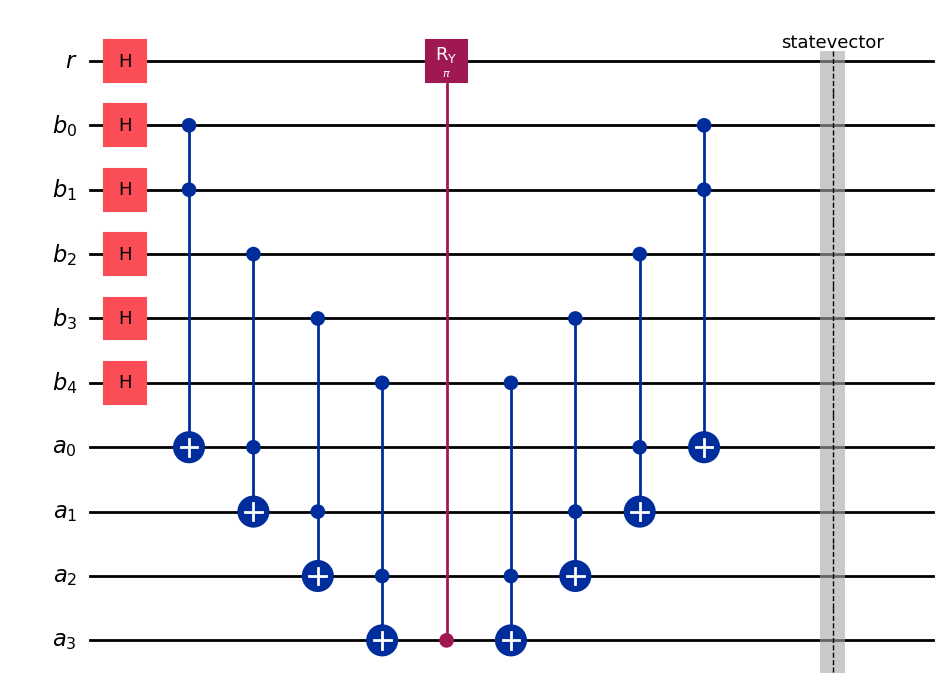

0 (0.1249999850988388+0j)
1 (0.1249999850988388+0j)
2 (0.1249999850988388+0j)
3 (0.1249999850988388+0j)
4 (0.1249999850988388+0j)
5 (0.1249999850988388+0j)
6 (0.1249999850988388+0j)
7 (0.1249999850988388+0j)
8 (0.1249999850988388+0j)
9 (0.1249999850988388+0j)
10 (0.1249999850988388+0j)
11 (0.1249999850988388+0j)
12 (0.1249999850988388+0j)
13 (0.1249999850988388+0j)
14 (0.1249999850988388+0j)
15 (0.1249999850988388+0j)
16 (0.1249999850988388+0j)
17 (0.1249999850988388+0j)
18 (0.1249999850988388+0j)
19 (0.1249999850988388+0j)
20 (0.1249999850988388+0j)
21 (0.1249999850988388+0j)
22 (0.1249999850988388+0j)
23 (0.1249999850988388+0j)
24 (0.1249999850988388+0j)
25 (0.1249999850988388+0j)
26 (0.1249999850988388+0j)
27 (0.1249999850988388+0j)
28 (0.1249999850988388+0j)
29 (0.1249999850988388+0j)
30 (0.1249999850988388+0j)
31 (0.1249999850988388+0j)
32 (0.1249999850988388+0j)
33 (0.1249999850988388+0j)
34 (0.1249999850988388+0j)
35 (0.1249999850988388+0j)
36 (0.1249999850988388+0j)
37 (0.12499

In [10]:
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, execute,  transpile
from qiskit.providers.aer import Aer

def control_rot_gate(qc, ctrl, res):
    qc.cry(pi, ctrl, res)

b = QuantumRegister(5,'b')
r = QuantumRegister(1,'r')
a = QuantumRegister(4, 'a')
qc = QuantumCircuit(r, b,  a)
qc.h(b)
qc.h(r)
create_multi_control_U(qc, b,r[0], a, control_rot_gate )

## Examine the circuit to check that it only has the allowed gates
for gate in qc.data:
    assert gate[0].name in ['ccx', 'h', 'cry', 'x'], f'Failed: your circuit is using a forbidden gate: {gate[0].name}'
# use a state vector simulator to obain the marked states
qc.save_statevector()
display(qc.draw('mpl', style='iqp'))
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')


circ = transpile(qc, simulator)


# Run and get counts
result = simulator.run(circ).result()
statevector = result.get_statevector()

for j in range(62):
    print(j, statevector[j])
    assert abs(statevector[j].real -0.125)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude ~ 0.125 for state corr. to |{j}>. This can happen if you did not ensure that the ancillary qubits are all set back to 0"

print('62', statevector[62])
assert abs(statevector[62].real + 0.125) <= 1E-03 and abs(statevector[62].imag)<= 1E-03, f"circuit must have amplitude ~ -0.125 for state corr. to |62>. "
print('63', statevector[63])
assert abs(statevector[63].real - 0.125) <= 1E-03 and abs(statevector[63].imag)<= 1E-03, f"circuit must have amplitude ~ 0.125 for state corr. to |63>. "


for j in range(64, 1024):
    print(j, statevector[j])
    assert abs(statevector[j].real)<= 1E-03 and abs(statevector[j].imag)<= 1E-03, f"circuit must have amplitude 0 for state corr. to |{j}>"

print('Passed: 5 points')

## Problem 4 (15 points)

In this problem, we are given a B-Tree data structure in terms of its root pointer and we wish to obtain a list of  all the keys stored in the tree in either ascending sorted order.

Write an efficient algorithm that traverses the tree and outputs a list of all its keys in sorted order. Your algorithm should visit each node exactly once. 

For your convenience the basic B-Tree class from the notes is reproduced below. Please run the code below before proceeding.

In [11]:
class BTreeNodeBase(object):
    def __init__(self, keys = [], ptrs = [], is_root=False, d = 10):
        # each internal node must contain at least d keys and at most 2d  keys
        # The root which may contain between 0 keys (if entire tree is empty) and 2d keys
        self.keys = list(keys) # the keys
        self.d = d # the value of d
        self.pointers = list(ptrs)  # the pointers 
        self.is_root = is_root
        self.parent = None # either None or a tuple (parent_node, idx) such that parent_node.pointers[idx] = self
        
    def is_leaf(self):
        """returns True if the node is a leaf or else returns False"""
        return len(self.pointers) == 0
    
    def set_parent(self, parent_node, idx):
        assert parent_node != None
        assert 0 <= idx and idx < len(parent_node.pointers)
        assert parent_node.pointers[idx] == self
        self.parent = (parent_node, idx)
    
    def find_key_internal(self, k):
        """ find_key_internal for a key k returns reference to node and the index into keys array if found.
            Otherwise, returns None
        """     
        n = len(self.keys)
        if n == 0: # empty node return False 
            return None
        # find first index i such that self.keys[i] >= k
        i = 0
        while i < n and self.keys[i] < k:
            i = i + 1
        if i < n and self.keys[i] == k:
            return (self, i) # we are done: found the key
        else: 
            if  self.is_leaf(): # if we are at a leaf, then key not found
                return None
            else: # otherwise, we recursively search in the appropriate child node
                return self.pointers[i].find_key_internal(k)
            
    def find_key(self, k):
        """find_key function to be called by outsiders at the root node"""
        assert self.is_root
        res = self.find_key_internal(k) # call the find_key_internal method
        return True if res != None else False 
    
    def find_successor(self, idx):
        """find_successor : traverse the node to the right of idx 
            and then keep traversing left children until we get to a leaf"""
        assert idx >= 0 and idx < len(self.keys) # assert that the index is a proper index
        assert not self.is_leaf() # do not call this function on a leaf
        child = self.pointers[idx+1] # get the right child 
        while not child.is_leaf():
            child = child.pointers[0] # go left 
        assert child.is_leaf() # we have gotten to the leftmost leaf
        return (child.keys[0], child)
    
    def __str__(self):
        return str(self.keys)
    
    def make_networkx_graph(self, G, node_id, parent_id, label_dict):
        node_label = str(self.keys)
        if self.parent != None:
            node_label =  "C"+str(self.parent[1]) + ": " + node_label
        else:
            node_label = "R: "+ node_label
        G.add_node(node_id, label=node_label)
        label_dict[node_id] = node_label
        if parent_id >= 0:
            G.add_edge(parent_id, node_id)
        n = len(self.pointers)
        new_id = node_id+1
        for i in range(n):
            new_id = self.pointers[i].make_networkx_graph(G, new_id, node_id, label_dict)
        return new_id + 1
    
    def rep_ok(self):
        """Check if the BTree respects  properties."""
        n = len(self.keys)
        p = len(self.pointers)
        d = self.d
        # node is a leaf with no pointers or it must have one more pointer than the number of keys
        assert p == 0 or p == n + 1, f'Node has {n} keys but {p} pointers'
        # are the keys in ascending order 
        for i in range(1, n):
            assert self.keys[i] > self.keys[i-1], f'Keys {keys[i-1]} and {keys[i]} fail to be in ascending order' 
        if self.is_root:
            assert self.parent == None # root has no parent
            assert 0 <= n and n <= 2 * d  # number of keys for root must be within [0, 2d]
            self.check_height_properties() # check that the length of all paths from root to leaf are the same
        else:
            assert self.parent != None # non root must have a parent
            assert d <= n and n <= 2 * d  # number of keys must be within [d, 2d]
        if p >= 1:
            for (j, child_node) in enumerate(self.pointers): # for each child node
                assert child_node.parent == (self, j) # is the parent pointer of the child node correct?
                assert child_node.d == self.d
                assert not child_node.is_root
                child_node.rep_ok() # check if the child node itself respect properties recursively
    
    def check_height_properties(self):
        """Check that the height of all child nodes are the same and return height of self"""
        if self.is_leaf():
            return 0
        else:
            depths= [child.check_height_properties() for child in self.pointers]
            d0 = depths[0]
            assert all(di == d0 for di in depths), f'Node with keys {self.keys} has mismatched depths'
            return 1 + d0
        
    def create_new_instance(self, keys, ptrs, is_root, d):
        """We need this to construct a new instance because we chose to split the implementation across three different classes"""
        return BTreeNodeBase(keys, ptrs, is_root, d)
    
    def fix_parent_pointers_for_children(self):
        for (j, child_node) in enumerate(self.pointers):
            child_node.set_parent(self, j)

%matplotlib inline
import networkx as nx 
from matplotlib import pyplot as plt 

def draw_btree_graph(n):
    G = nx.DiGraph()
    labels = {}
    n.make_networkx_graph(G, 0, -1, labels)
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # positions for all nodes
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    nx.draw(G, pos=pos, with_labels=True,  node_shape="s", font_size=5, labels=labels, node_color="none",  bbox=dict(facecolor="cyan", edgecolor='black'))
    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.05)
    plt.axis("off")
    plt.show()

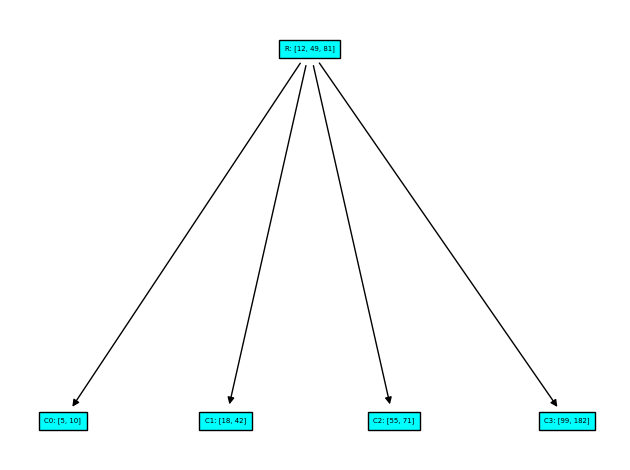

In [12]:
c0 = BTreeNodeBase(keys=[5, 10], ptrs=[], d=2)
c1 = BTreeNodeBase(keys=[18, 42], d=2)
c2 = BTreeNodeBase(keys=[55, 71], d=2)
c3 = BTreeNodeBase(keys=[99, 182], d=2)
root = BTreeNodeBase(keys=[12, 49, 81], ptrs=[c0, c1, c2, c3], is_root=True, d=2)
root.fix_parent_pointers_for_children()
root.rep_ok()
draw_btree_graph(root)

Consider the example above. The list in ascending order will be
`[5, 10, 12, 18, 42, 49, 55, 71, 81, 99, 182]`. 

In [13]:
def get_ascending_sorted_list(root):
    
    # your code here
#     raise NotImplementedError

    result = []
    
    def inorder(node: BTreeNodeBase):
        if node.is_leaf():
            result.extend(node.keys)
            return
        m = len(node.keys)
        for i in range(m):
            inorder(node.pointers[i])
            result.append(node.keys[i])
        inorder(node.pointers[m])
        
    if root is None:
        return result
    if root.is_leaf() and len(root.keys) == 0:
        return result
    
    inorder(root)
    return result

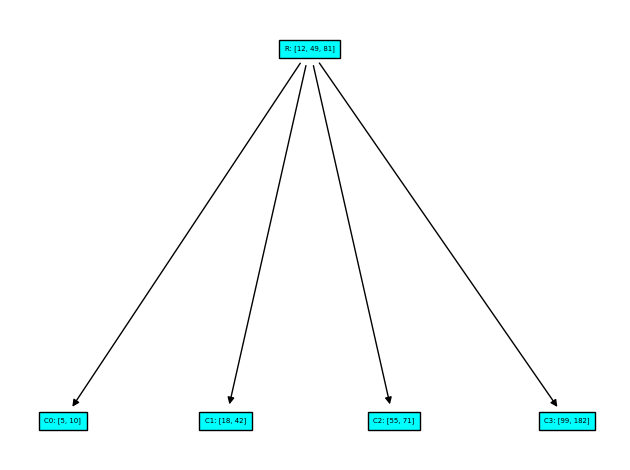

[5, 10, 12, 18, 42, 49, 55, 71, 81, 99, 182]
Passed: 5 points


In [14]:
c0 = BTreeNodeBase(keys=[5, 10], ptrs=[], d=2)
c1 = BTreeNodeBase(keys=[18, 42], d=2)
c2 = BTreeNodeBase(keys=[55, 71], d=2)
c3 = BTreeNodeBase(keys=[99, 182], d=2)
root = BTreeNodeBase(keys=[12, 49, 81], ptrs=[c0, c1, c2, c3], is_root=True, d=2)
root.fix_parent_pointers_for_children()
root.rep_ok()
draw_btree_graph(root)
lst = get_ascending_sorted_list(root)
print(lst)
assert lst == [5, 10, 12, 18, 42, 49, 55, 71, 81, 99, 182], f'Expected: [5, 10, 12, 18, 42, 49, 55, 71, 81, 99, 182], obtained: {lst}'
print('Passed: 5 points')

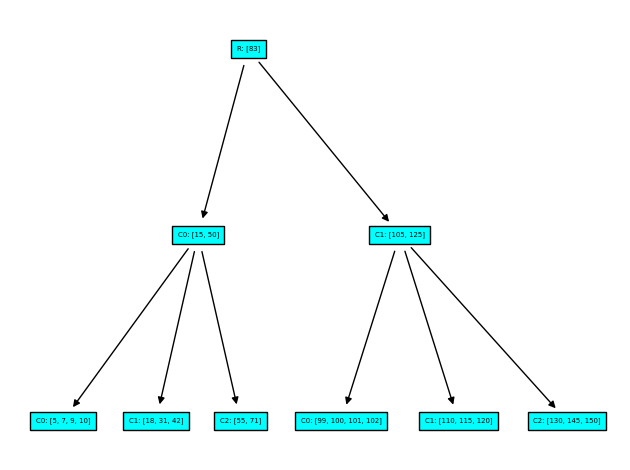

[5, 7, 9, 10, 15, 18, 31, 42, 50, 55, 71, 83, 99, 100, 101, 102, 105, 110, 115, 120, 125, 130, 145, 150]
Passed: 10 points


In [15]:
c0 = BTreeNodeBase(keys=[5, 7, 9, 10], ptrs=[], d=2)
c1 = BTreeNodeBase(keys=[18, 31, 42], d=2)
c2 = BTreeNodeBase(keys=[55, 71], d=2)
c3 = BTreeNodeBase(keys=[99, 100, 101, 102], d=2)
c4 = BTreeNodeBase(keys=[110, 115, 120], d=2)
c5 = BTreeNodeBase(keys=[130, 145, 150], d=2)


r1 = BTreeNodeBase(keys=[15, 50], ptrs=[c0, c1, c2], is_root=False, d=2)
r2 = BTreeNodeBase(keys=[105, 125], ptrs=[c3, c4, c5], is_root=False, d=2)
root = BTreeNodeBase(keys=[83], ptrs=[r1, r2], is_root=True, d=2)
r1.fix_parent_pointers_for_children()
r2.fix_parent_pointers_for_children()
root.fix_parent_pointers_for_children()
root.rep_ok()
draw_btree_graph(root)
lst = get_ascending_sorted_list(root)
print(lst)
expected_lst  = [5, 7, 9, 10, 15, 18, 31, 42, 50, 55, 71, 83, 99, 100, 101, 102, 105, 110, 115, 120, 125, 130, 145, 150]
assert lst == [5, 7, 9, 10, 15, 18, 31, 42, 50, 55, 71, 83, 99, 100, 101, 102, 105, 110, 115, 120, 125, 130, 145, 150], f'Expected: {expected_lst}, obtained: {lst}'
print('Passed: 10 points')

## Problem 5 (15 points)

We are given a string `s` of length `n`. Use a suffix trie to find the longest  substring that occurs at least twice in the string. 
  - The occurrences of the substring may overlap. For instance, consider `saunauna$`: the substring `auna` repeats twice occurring at positions indexed `1` and `4` respectively. These occurrences actually overlap.

### Examples

 - `saunauna$`: the longest repeating substring is `auna`. It repeats twice.
 - `mamamia$` : the longest repeating substring is `mam`. It repeats twice.
 - `CATTACCGACATTA$` : The longest repeating substring is `CATTA`.

Write a function `longest_repeating_substring(s)` that returns the longest repeating substring. For your convenience, we have provided you the SuffixTrie data structure and code for efficient construction from our notes. Be sure to run them first before you proceed.

**Hint:** Suppose I gave you a substring `auna` for `saunauna$`: how do we figure out that it repeats at least twice from the suffix trie? Take a look at the examples above and the suffix tries constructed below.

In [16]:
### DO NOT PANIC: This is all the code from the suffix trie notes. 
import networkx as nx
from matplotlib import pyplot as plt

class SuffixTrieNode:
    
    def __init__(self, node_id, orig_str):
        self.orig_str = orig_str # a reference to the entire string
        self.outgoing_edges = {} # dictionary from chars to edges
        self.suffix_link = None  # suffix link : initially set to None
        self.id = node_id # Note: id == 0 is taken to be root for now.
        self.depth = 0 # automatically set the depth when node's parent is set
        self.parent = None # parent pointer
        
    def is_root(self):
        return self.id == 0
        
    def get_edge(self, char):
        if char in self.outgoing_edges:
            return self.outgoing_edges[char]
        else:
            return None
        
    def is_leaf(self):
        return False
    
    def add_suffix_link(self, node):
        self.suffix_link = node
        
    def add_outgoing_edge(self, new_edge):
        edge_init_char = new_edge.get_char_at(0)
        # ensure that an edge with the initial character does not exist
        assert edge_init_char not in self.outgoing_edges, f"Char {edge_init_char} already has an outgoing edge for node id:{self.id}"
        #ensure that the new_edge src matches self
        assert new_edge.src.id == self.id, f"Src node in outgoing edge id:{new_edge.src.id} does not match node id {self.id}"
        # add the new edge to the dictionary with the initial char as key
        self.outgoing_edges[edge_init_char] = new_edge
        # add a parent pointer from destination to the src of the new edge
        new_edge.dest.parent = new_edge.src # set the parent pointer of the new edges dest
        if not new_edge.is_leaf_edge(): # set the depth of the destination node for the edge
            new_edge.dest.depth = self.depth + new_edge.length()
       
        
    def find_edge_corresponding_to_child(self, child_node):
        # search among outgoing edges to see if there is one whose destination is the child node
        for (_, edge) in self.outgoing_edges.items():
            if edge.dest.id == child_node.id:
                return edge
        return None # no such edge found
    
class SuffixTrieLeaf:
    def __init__(self, node_id, orig_str, suffix_start_pos):
        self.orig_str = orig_str # the original string
        self.id  = node_id # the id of this node
        assert 0 <= suffix_start_pos < len(orig_str) 
        self.suffix_start_pos = suffix_start_pos # the starting pos for the suffix
        self.parent = None # parent pointer initially set to None
        
    def is_leaf(self):
        return True
    

    
class SuffixTrieEdge:
    
    def __init__(self, orig_str, src_node, dest_node, lo, hi):
        assert 0 <= lo < len(orig_str) # lo must be a valid position in the original string
        # if destination node is a leaf then hi == -1 else hi != -1
        if dest_node.is_leaf():
            assert hi == -1 
        else:
            assert lo <= hi <= len(orig_str)
        assert not src_node.is_leaf() # src node cannot be a leaf.
        # edge represents str[lo]...str[hi] inclusive if hi != -1
        # or set[lo] ... str[end]
        self.orig_str = orig_str # set the orig_str field
        self.lo = lo # set lo/hi
        self.hi = hi 
        self.src = src_node # set src/dest
        self.dest = dest_node
        
    def is_leaf_edge(self):
        return self.hi == -1
    
    def length(self):
        if self.hi == -1:
            return -1
        else:
            return self.hi - self.lo + 1
    
    def get_char_at(self, offs):
        assert self.hi == -1 or offs + self.lo <= self.hi
        return self.orig_str[self.lo + offs]
    
    
    def get_sub_str(self, end=-1):
        if self.hi == -1:
            return self.orig_str[self.lo:end] if (end != -1) else self.orig_str[self.lo:]
        
        else:
            return self.orig_str[self.lo:self.hi+1]
        
        
    def reset_hi_and_dest(self, new_dest, new_hi):
        assert new_hi >= self.lo, f"Cannot replace hi value by {new_hi}"
        assert not new_dest.is_leaf(), "Cannot replace destination by a leaf node"
        self.hi = new_hi
        new_dest.parent = self.src
        new_dest.depth = self.src.depth + self.length()
        self.dest = new_dest
        
    
    
        
class TrieAddress:
    
    def __init__(self,  node, edge=None, offs=0):
        assert 0 <= offs 
        self.node = node # set the node
        self.edge = edge # set the edge
        self.offs = offs # set the offset
        if self.edge != None:
            assert self.offs > 0
        else:
            assert self.offs == 0
    
    def traverse_next(self, c):
        """Function traverse_next: find the next address (if one exists) that 
           is obtained when we encounter character c. Return the new address if 
           one exists or else return None."""
        if self.edge == None: # Is the address pointing to an internal node?
            # Yes: address is just a pointer to an internal node/root.
            # check if the node has an outgoing edge corresponding to 'c'
            new_edge = self.node.get_edge(c) # try to get a new edge corresponding to character `c`.
            if new_edge == None:
                return None # No such edge, then return None
            else: # new_edge != None
                assert new_edge.get_char_at(0) == c # got an edge. Check that we got the right one.
                if new_edge.is_leaf_edge() or new_edge.length() > 1: # if new edge is a leaf edge, or its length is more than 2
                    return TrieAddress( self.node, new_edge,  1 ) # return an address with an offset of 1 into the new edge
                else:
                    new_node = new_edge.dest # new edge is not a leaf and must have length exactly one
                    return TrieAddress( new_node, None, 0) # the address must therefore be the destination.
        else: # self.edge != None
            # No: address is a pointer self.offs past self.node along self.edge
            edge = self.edge 
            if edge.lo + self.offs < len(edge.orig_str) and edge.get_char_at(self.offs) == c:# if the next char is a `c`
                if edge.is_leaf_edge() or self.offs < edge.length() -1 : # is the edge a leaf edge or do we have one more char in the edge?
                    return TrieAddress(self.node, self.edge, self.offs+1) # return a new address that is just one further offset along same edge
                else:
                    dest_node = edge.dest # we reaches the destination node
                    return TrieAddress( dest_node, None, 0) # return the new address
            else: # next char is not a `c`
                return None # no next address
            
    def compute_suffix(self, debug=False):
        # to compute a suffix, follow the suffix link from the source node
        #                      to get to a new source node.
        #                     next, fetch the appropriate edge 
        #                     finally, move offset distance into the edge.
        node = self.node # unpack
        edge = self.edge 
        offs = self.offs 
        if node.id == 0 and offs <= 1: # If we are at the very root, the suffix is the same.
                return TrieAddress(node, None, 0) # let's keep the suffix the same
        if node.id == 0: # if we are the the root, the suffix node is the root
            s_node = node
        else:
            s_node = node.suffix_link # otherwise, follow the suffix link.
            assert s_node != None # assert that the suffix link should exist
        
        if edge == None: # if the address points right to a node, 
            return TrieAddress(s_node, None, offs) # the suffix address points right to the suffix node.
        
        if node.id == 0: # Are we are at the root.
            c = edge.get_char_at(1) # compute the char c at position 1 of the edge.
            s_edge = node.get_edge(c) # get the outgoing edge for that character c
            assert s_edge != None, f"No edge for char {c} at node {node.id}" # this edge should exist
            offs = offs - 1 # suffix is offs -1 length along s_edge
            fwd = 1 # set the fwd pointer to 1 to indicate that we have moved one step fwd
            if debug:
                print(f"Debug: Looking for {offs} past {s_edge.src.id, s_edge.dest.id}")
        else:
            c = edge.get_char_at(0) # get the initial char at the edge
            s_edge = s_node.get_edge(c) # get the corresponding edge at the suffix link
            fwd = 0
            assert s_edge != None, f"No edge for char {c} at node {s_node.id}"
            if debug:
                print(f"Debug: Looking for {offs} past {s_edge.src.id, s_edge.dest.id}")

        assert s_edge != None # assert that the edge should exist
         # Now we have to find the location that is offs steps away from s_node 
         # along s_edge. 
        if s_edge.is_leaf_edge() or offs < s_edge.length(): 
            # if the edge is leaf or the offset is less than the length
            return TrieAddress(s_node, s_edge, offs) # we found the required suffix address along s_edge itself
        else:
            new_offs = offs # otherwise, move offset distance away from edge
            # we may have to move across multiple nodes/edges to find the location 
            # that is offs away from node s_node.
            while (not s_edge.is_leaf_edge()) and new_offs >= s_edge.length():
                new_offs = new_offs - s_edge.length() # move forward edge length from s
                fwd = fwd + s_edge.length()
                s_node = s_edge.dest # get the destination node
                if new_offs > 0:
                    c = edge.get_char_at(fwd) # get the edge corresponding to the character
                    s_edge = s_node.get_edge(c)
                    assert s_edge != None
                else:
                    break
            if new_offs > 0:
                return TrieAddress(s_node, s_edge, new_offs)
            else:
                return TrieAddress(s_node, None, 0)

    def create_new_edge_at(self, orig_str, i, node_id):
        """Create a new leaf edge in the suffix trie by 
           inserting the char at orig_str[i]. """
        assert i >= 0 and i < len(orig_str) # i better be a valid index into orig_str
        c = orig_str[i]  # fetch the char
        node = self.node # unpack 
        edge = self.edge 
        offs = self.offs
        if edge == None: # if the current address points to an internal node
            assert offs == 0
            assert node.get_edge(orig_str[i]) == None, f"Node {node.id} already has outgoing edge for {orig_str[i]}"
            new_leaf = SuffixTrieLeaf(node_id, orig_str, i - node.depth) # create a new leaf node to be the destination
            new_edge = SuffixTrieEdge(orig_str, node, new_leaf, i, -1) # create a leaf edge with 
            node.add_outgoing_edge(new_edge) # add it to the node pointed by the current address
            return (node, new_leaf, False) # return the node at which insertion happend, the new leaf and whether or not a new internal node was created
        else:
            assert edge.get_char_at(offs) != c, f'{edge.get_char_at(offs)}, {c}' # if the next char is c, we should not be calling this function
            # split edge into two
            node1 = SuffixTrieNode(node_id, orig_str) # create a new node       
            src_node = edge.src 
            dest_node = edge.dest 
            lo = edge.lo
            hi = edge.hi
            # modify the current edge to make node1 its destination and the 
            # value of hi to be lo. +offs -1 
            edge.reset_hi_and_dest(node1, lo+offs-1)
            # create two new edges 
            # first one consists of the remaining part of edge
            new_edge_1 = SuffixTrieEdge(orig_str, node1, dest_node, lo+offs, hi)
            node1.add_outgoing_edge(new_edge_1)
            suffix_start_pos = i - node1.depth
            # create a new leaf node 
            new_leaf = SuffixTrieLeaf(node_id+1, orig_str, suffix_start_pos)
            # create a new leaf edge 
            new_edge_2 = SuffixTrieEdge(orig_str, node1, new_leaf, i, -1)
            node1.add_outgoing_edge(new_edge_2)
            return (node1, new_leaf, True) # return newly created internal node and new leaf, True indicates that the internal node we are returning is newly created
            
    def is_at_root(self):
        return self.node.id == 0 and self.offs == 0
            
    def compute_depth(self):
        if self.edge == None:
            return self.node.depth
        else:
            return self.node.depth + self.offs 
    
    def __str__(self):
        edge = self.edge
        return f'{self.node.id}, {(edge.src.id, edge.dest.id) if edge != None else None}, {self.offs}'
 


def draw_networkx_graph(root, end=-1, highlight_addr=None, filename=None):
    worklist = [root]
    node_labels={}
    edge_str_label = {}
    suffix_links = [] 
    leaf_nodes = []
    internal_nodes = []
    G = nx.DiGraph()
    while len(worklist) > 0:
        node = worklist.pop()
        G.add_node(node.id)
        if node.is_leaf():
            leaf_nodes.append(node.id)
            node_labels[node.id]= "l"+str(node.id) + "s"+str(node.suffix_start_pos)
            continue
        else:
            internal_nodes.append(node.id)
            node_labels[node.id]= "n"+str(node.id)
        if node.suffix_link != None:
            suffix_links.append((node.id, node.suffix_link.id))
        for (c, edge) in node.outgoing_edges.items():
            (u, v) = (edge.src.id, edge.dest.id)
            G.add_edge(u, v)
            s = edge.get_sub_str(end)
            edge_str_label[(u,v)] = s
            worklist.append(edge.dest)            
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # positions for all nodes
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=internal_nodes,  node_shape="s", node_color="lightcyan")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=leaf_nodes, node_shape="s", node_color="lightgreen")
    nx.draw_networkx_edges(G, pos=pos,width=2.0)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='k')
    #nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_char_label, font_color='red')
    nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_str_label, font_size=5,font_color='blue', rotate=False)
    nx.draw_networkx_edges(G, pos, width=0.5, edgelist=suffix_links, style='dashed', edge_color='r', connectionstyle='arc3,rad=0.2')
    if highlight_addr != None:
        node = highlight_addr.node 
        edge = highlight_addr.edge
        offs = highlight_addr.offs
        nx.draw_networkx_nodes(G, pos=pos, nodelist=[node.id],  node_shape="s", node_color="yellow")

        if edge != None:
            nx.draw_networkx_edges(G, edgelist=[(edge.src.id, edge.dest.id)], edge_color='b', width=2, pos=pos)
            c = edge.get_char_at(0)
            txt = f'{offs}'
            x0,y0 = pos[node.id]
            x1,y1 = pos[edge.dest.id]
            (x, y) = ((3*x0+x1)/4, (3*y0+y1)/4)
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.text(x-0.5, y+0.5, s=txt,  fontsize=8, bbox=props,horizontalalignment='center')
        
    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    if filename != None:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
# Implementation of Ukkonen's algorithm
def construct_suffix_trie(orig_str, debug=False):
    root = SuffixTrieNode(0, orig_str) # create a root node with id = 0
    root.add_suffix_link(root) # make the root suffix link to itself
    node_list= [root] # maintain a list of all nodes for our bookkeeping
    addr = TrieAddress(root, None, 0) # initialize the address to point to the root
    n = len(orig_str)
    for i in range(n): # go through each position in the original string
        # We will now work on phase number i of the algorithm
        c = orig_str[i] 
        if debug:
            print(f"Phase # {i}: inserting {c}")
        node = None # initialize pointers to node and new_node to None
        new_node = None # these pointers will help us with the adding of suffix links for newly created nodes later
        dest = addr.traverse_next(c) # try to move from the current address to a new address given the character `c`.
        if dest != None:
            addr = dest # dest exists, we simply update addr to that destination and continue
        else: # no such destination exists. Rule # 2 applies and we have to create new internal nodes
            while dest == None and not addr.is_at_root(): # while the current addr does not have a destination for next character c, and it is not at the root
                if debug:
                    print(f"Creating new node with char {orig_str[i]} at {addr}")
                # create a new node and a new leaf at the current address
                (new_node, new_leaf, newly_created) = addr.create_new_edge_at(orig_str, i, len(node_list))
                if debug:
                    print(f"Created new node: {new_node.id}")
                
                if node != None and not node.is_root():
                    node.add_suffix_link(new_node) # add a suffix link from the previously created node to the new node
                    if debug:
                        print(f"D1: Adding Suffix Link:{node.id} ---> {new_node.id}")
                if newly_created:
                    node_list.append(new_node) # if it is freshly created then add it to the list of nodes
                node_list.append(new_leaf)
                node = new_node # update pointer to previously created node
                addr = addr.compute_suffix() # compute the suffix of the address
                assert addr != None, f"Suffix computation failed. "
                dest = addr.traverse_next(c) # see if there is a destination with char c from the newly computed address
                #if dest != None: # if there is a destination
                #    new_node.add_suffix_link(addr.node) # add the last suffix link
                #    if debug:
                #        print(f"D2: Adding Suffix Link: {new_node.id} --> {addr.node.id}")
            # We are out of the loop
            # add a suffix link from the last created node to the current address.
            if node != None:
                if debug:
                    print(f"D3: Adding Suffix Link: {new_node.id} --> {addr.node.id}")
                node.add_suffix_link(addr.node)
            
            if dest == None:
                # if this happens, we are at the root
                # insert the char `c` here.
                assert addr.is_at_root()
                (new_node, new_leaf, newly_created) = addr.create_new_edge_at(orig_str, i, len(node_list))
                assert not newly_created 
                node_list.append(new_leaf)
            else:
                # this indicates that the char c already exists.
                addr = dest
        
        if debug:
            print("currently at: ", addr)
            draw_networkx_graph(root, end=i+1, highlight_addr=addr, filename=f"{orig_str}.{i}.png")
    return root

Run the code below to generate suffix tries for the three examples discussed above.

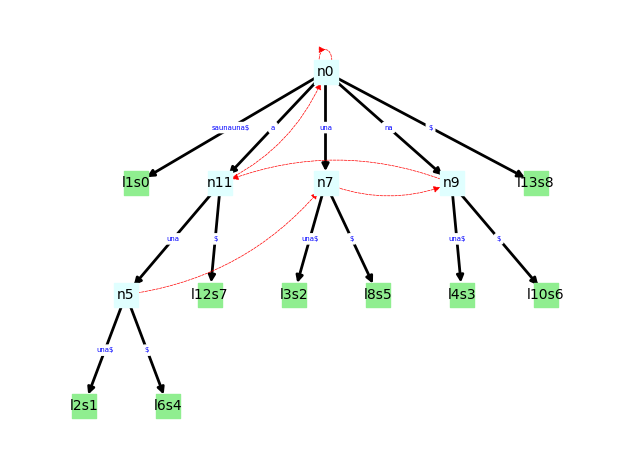

In [17]:
root = construct_suffix_trie("saunauna$")
draw_networkx_graph(root)

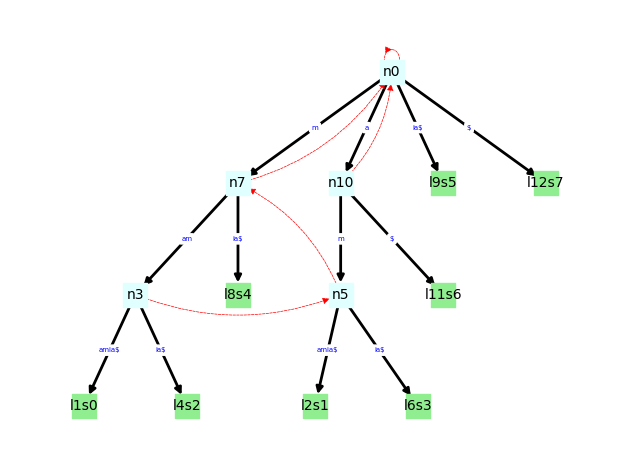

In [18]:
orig_str = "mamamia$"
root = construct_suffix_trie(orig_str)
draw_networkx_graph(root)

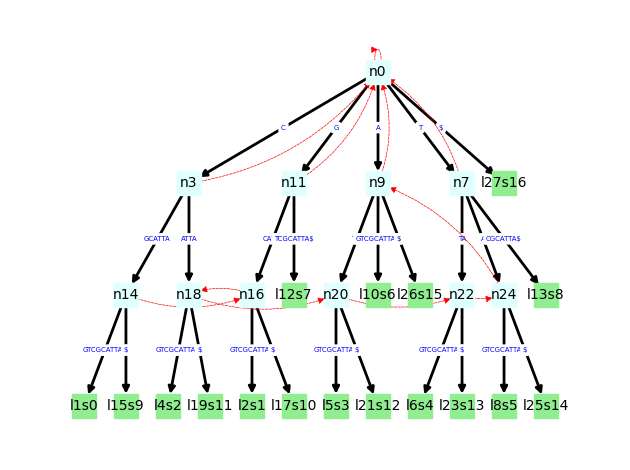

In [19]:
orig_str = "CGCATTAGTCGCATTA$"
root = construct_suffix_trie(orig_str)
draw_networkx_graph(root)

Implement the function `find_longest_repeating_substring(s)` that finds the longest repeating substring in an input string `s`. It must return the repeating substring.

In [20]:
def find_longest_repeating_substring(s):
    root = construct_suffix_trie(s)
    
    # your code here
# raise NotImplementedError

    best_node = None
    best_depth = 0
    
    def dfs(node):
        nonlocal best_node, best_depth
        if node.is_leaf():
            return 1
        
        leaf_count = 0
        for edge in node.outgoing_edges.values():
            leaf_count += dfs(edge.dest)
            
        if leaf_count >= 2 and node.depth > best_depth:
            best_depth = node.depth
            best_node = node
            
        return leaf_count
    
    dfs(root)
    
    if best_node is None or best_depth == 0:
        return ""
    
    parts = []
    node = best_node
    while not node.is_root():
        parent = node.parent
        edge = parent.find_edge_corresponding_to_child(node)
        parts.append(edge.get_sub_str())
        node = parent
    parts.reverse()
    return "".join(parts)

In [21]:
s1 = find_longest_repeating_substring("mamamia$")
print(s1)
assert s1 == 'mam'
print('Passed: 5 points')

mam
Passed: 5 points


In [22]:
s1 = find_longest_repeating_substring("CTGATGGCGTACGATGGCTGG$")
print(s1)
assert s1 == 'GATGGC'
print('Passed: 5 points')

GATGGC
Passed: 5 points


In [23]:
from random import choice, randint

def make_random_string(l):
    lst = [] 
    lst1 = []
    lst2 = []
    lst3 = []
    assert l >= 20
    j = randint(4, l//4)
    k = randint(4, l//4)
    for i in range(j):
        lst.append(choice(['A','C','T','G']))
    for i in range(k):
        lst1.append(choice(['A','C','T','G']))
    for i in range(k):
        lst3.append(choice(['A','C','T','G']))
    for i in range(l - k - j):
        lst2.append(choice(['A','C','T','G']))
    
    s = ''.join(lst)
    s1 = ''.join(lst1)
    s2 = ''.join(lst2)
    s3 = ''.join(lst3)
    return  (s1 + s + s2 + s + s3 +  '$', j)

def count_occurrences(s, s1):
    m = len(s1)
    n = len(s)
    count = 0
    for i in range(n-m):
        match = True
        for j in range(m):
            if s[i+j] != s1[j]:
                match = False
                break
        if match:
            count = count + 1
    return count

for i in range(100):
    s, j = make_random_string(150)
    print(s)
    s1 = find_longest_repeating_substring(s)
    print(s1)
    k = count_occurrences(s, s1)
    print(f'# occurrences: {k}')
    print(f'Size of longest repeat: {len(s1)}, lower bound: {j}')
    assert k >= 2
    assert len(s1) >= j
print('Passed: 5 points')

TTGGAAGCGATCGTTGGATCTCAAGAACCCAATTGTGCGTGCGTAAAGGGGAGTAAGACGATGGCGCTAAGGTAAAATCGTCAGGGTAGCGTGTGTTCGAATCACTGAGGGGAAGGTACTATTACAACACAATTCAGACACATGCTTCAGCCCAATTGTGCGTGCGTAAAGGTAAATCAGGTGTAGCTAGAATCACAT$
CCCAATTGTGCGTGCGTAAAGG
# occurrences: 2
Size of longest repeat: 22, lower bound: 21
CGGTTCCAGATGCGATCTGTAGATGCTTTATACTGACCCGCTACCTGGCCCGGTGGCATGCGTCGCTCTGACACCGAAACGCAAAAGAGCATCGAGATCGCGATCATCGGTCGTATCGCGCTGCAAATATCCAATGTAAGATGCATACGCCTGACCCGCTACCTGGCCCGGTGGCATCGCGTTCGGCAATACCAACTGTGGGAGTCAGC$
CTGACCCGCTACCTGGCCCGGTGGCAT
# occurrences: 2
Size of longest repeat: 27, lower bound: 27
CACCATGCGCCGTCAGGCATATTGCCCTGGAATCAGAGCGCGGGTTGACCACCAGCTCCACCCGAGTGGATTTGTTGAACGCCTCGGAAGACTCAATTGTTACATCCCTATCGGATATGCTATGACAAAATGAGGGGTAGTCCTAGGTGAAGAGCGCGGGTTGACTCAGCGGGCTGTAGGGAATTTTGGTTCTCCTGCA$
AGAGCGCGGGTTGAC
# occurrences: 2
Size of longest repeat: 15, lower bound: 15
GCTCGTGAACAAAGTATAAAATTACCCCTCGGGTGCCGTGCTCAAAACCCATTCGAAGGACGTTTCAAGATAGTCCATTCTCTTCGATGCCGGCTAAAATATTCAGGCATGAGGATTTCACTACAAGAACCAATTTTC

GTTAGCGTTCTGTTTTTTGTCT
# occurrences: 2
Size of longest repeat: 22, lower bound: 22
ATAGCATTGGGGCTGATAGCGGCGTTGAGATCTTCCCCTCCAATTATTCGTAAGCGGCGCTTCATTAAATATCCTATGCGATCGACATGGATATAAGGGGGGGGTTATCGAAGACCTCTAGAACTCACCCATAGGAAGCCGCCGATGAGATTGGGGCTGATAGCGGCGTTGAGATCTTCCCCTCCAACAGT$
ATTGGGGCTGATAGCGGCGTTGAGATCTTCCCCTCCAA
# occurrences: 2
Size of longest repeat: 38, lower bound: 35
CTACGTCAGAACCGAGGAGGTATCCTTTCCAGTCGATAGCAAATGCAGGTCATATCCGTCCACGTAGATCGGGTTTTCCTCTCCCACAGGCGAATGCGACAGTCCCTCCCCGAAAATCCATGGTAGCTTCGTCGAACGGCAAGTTGTGTATCAGAACCGAGGAGGTATCCTTTTTGGG$
TCAGAACCGAGGAGGTATCCTTT
# occurrences: 2
Size of longest repeat: 23, lower bound: 23
CAGTCGAGCCAACCCCGCCTTAAGAGCACACCGGGAACCCCGACGTGTATGAGCCAGTAACGGGCGTGCACTCTACCCACGCTTTGACTGGAGACAAAAGCGGAAACAACGCGTCCTCAAACTATATTCTAGTCTCATACCCTCCGTATCGCACACCGGGAACCCCGACGTTATGGTATCTCCGGTACCTTCCACT$
GCACACCGGGAACCCCGACGT
# occurrences: 2
Size of longest repeat: 21, lower bound: 21
AAAAGAAGAGAGCCATACCGACGCACTCGTGGGTAAGGGTGAAGTCGTTCATAGGCCAAATTCGGGATCGCGGCTGC

## That's All Folks!! 